<center>
    COMP4600/5300 - Reinforcement Learning

# Homework 1 - K-armed Bandit Algorithms

### Due: Monday, September 14th 11:59 pm
    
</center>

Student Name: Amin Majdi 

The purpose of this homework is to study different properties of multi-armed bandit algorithms.

In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt 

## Part 1 

Build a testbed by generating 500 randomly selected k-armed bandit problems with $k = 7$.
For each bandit problem, select the true action values from a Gaussian distribution with mean 0 and variance 1.0. For each action $a$, select an actual reward value from a normal distribution with mean $Q^*(a)$ and variance 1.0. For an algorithm, one run includes playing a single bandit problem for 1000 time steps. The algorithm's behavior will be evaluated by averaging its performance over 500 bandit problems.

In [2]:
# Write a function that generates one k-armed bandit problem
# that returns Q*(a) for that problem

# Your code here
def k_armed_bandit():
    Q_star=[np.random.normal(0,1,num_arms)for i in range(num_runs)]
    return Q_star #it a Q*=[num_arms*num_runs] for all runs 
    



## Part 2

Implement the sample-average algorithm and run it on the testbed you developed in previous part according to the following settings:
1. Using greedy action selection
2. Using $\varepsilon$-greedy action selection with $\varepsilon=0.01$ and $\varepsilon=0.1$
3. Using upper-confidence bound action selection with $c=1$ and $c=2$


In [3]:
# Write a function that plays a given k-armed bandit problem
# this function should include greedy, epsilon-greedy and UCB action selection strategies.
# You can include all strategies in one function or write two functions (one for epsilon-greedy and another for UCB)
# your implementation should return the selected action and the reward gained by selecting that action

# Your code here
def play_k_armed_bandit(e,c,Q_star):
    optimal_value_index=np.empty(shape=(num_runs,1),dtype='object')
    reward = np.empty(shape=(num_runs,num_timesteps),dtype='object')
    is_optimal=np.empty(shape=(num_runs,num_timesteps),dtype='object')
    
    for i in range(num_runs):
        q=Q_star[i][:]
        optimal_value_index[i]=np.argmax(q)
        Q_t=[0]*num_arms
        action_counter=[0]*num_arms # how many times the action is selected
        
        for j in range(num_timesteps):
            if c == 0:
                if np.random.rand(1)> e:
                    action_index=np.argmax(Q_t)                    
                else:
                    action_index=Q_t.index(np.random.choice(Q_t))
                    
            elif c!=0:
                if j<num_arms:
                    for x in range(num_arms):
                        if action_counter[x]==0:
                            action_index=x
                            break                           
                        else: 
                            continue
                            
                else:
                    Q_c=[0]*num_arms
                    for ii in range(num_arms):
                        Q_c[ii]=Q_t[ii]+c*np.sqrt(np.log(j)/action_counter[ii])
                        
                    action_index=np.argmax(Q_c)
                    
            action_counter[action_index]+=1 
            reward[i][j]=np.random.normal(q[action_index],1)
            Q_t[action_index]=Q_t[action_index]+(1/action_counter[action_index])*(reward[i][j]-Q_t[action_index])
            
            if action_index ==optimal_value_index[i]:
                is_optimal[i][j]=1
                
            else:
                is_optimal[i][j]=0
                
    return(reward,is_optimal)  
    


In [4]:
# Write a function that plays all the games asked in the question
# your implementation should loop over all strategies, all runs, and all time steps
# and should output the collected rewards and number of best action selections for each strategy

# Your code here

def play():
        results = np.empty(shape=(num_strategies,2),dtype='object')
        Q_star=k_armed_bandit()# we want the same Q_star for all 5 method.
        for s in range(num_strategies):
            if s ==0:
                results[0,0],results[0,1]=play_k_armed_bandit(0,0,Q_star)
            if s ==1:
                results[1,0],results[1,1]=play_k_armed_bandit(0.1,0,Q_star)
            if s ==2:
                results[2,0],results[2,1]=play_k_armed_bandit(0.01,0,Q_star)
            if s ==3:
                results[3,0],results[3,1]=play_k_armed_bandit(0,1,Q_star)
            if s ==4:
                results[4,0],results[4,1]=play_k_armed_bandit(0,2,Q_star) 
                
        return results


In [5]:
# Use the previous function with actual values to run the experiments


# Your code here
num_arms = 7
num_strategies = 5
num_runs = 500
num_timesteps = 1000

results=play()# all rewards and optimal averages are stored in result


For all three settings, plot the **average reward** and **%optimal action** graphs.

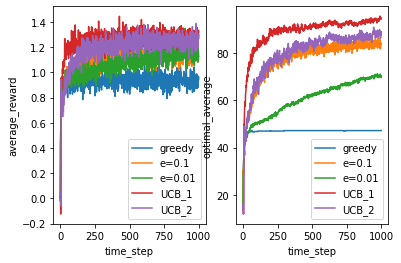

In [6]:
# Average the rewards and number of best action selections over all runs
# then plot (a) average reward, (b) %optimal action over all time steps
# you should plot two subplots (a and b) each showing all strategies

# Your code here
def average(reward,is_optimal):
    average_reward=[0]*num_timesteps
    optimal_average=[0]*num_timesteps
    for i in range(num_timesteps):
        average_reward[i]=(np.sum(reward[:,i]))/len(reward[:,i])
        optimal_average[i]=(np.sum(is_optimal[:,i])/len(is_optimal[:,i]))*100
        
    return(average_reward,optimal_average)

reward_greedy,optimal_average_greedy=average(results[0,0],results[0,1])
reward_egreedy_1,optimal_average_egreedy_1=average(results[1,0],results[1,1])
reward_egreedy_01,optimal_average_egreedy_01=average(results[2,0],results[2,1])
reward_UCB_1,optimal_average_UCB_1=average(results[3,0],results[3,1])
reward_UCB_2,optimal_average_UCB_2=average(results[4,0],results[4,1])

fig=plt.figure()

plt.subplot(1,2,1)
plt.xlabel("time_step")
plt.ylabel("average_reward")
plt.plot(range(num_timesteps),reward_greedy,label='greedy')
plt.plot(range(num_timesteps),reward_egreedy_1,label='e=0.1')
plt.plot(range(num_timesteps),reward_egreedy_01,label='e=0.01')
plt.plot(range(num_timesteps),reward_UCB_1,label='UCB_1')
plt.plot(range(num_timesteps),reward_UCB_2,label='UCB_2')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("time_step")
plt.ylabel("optimal_average")
plt.plot(range(num_timesteps),optimal_average_greedy,label='greedy')
plt.plot(range(num_timesteps),optimal_average_egreedy_1,label='e=0.1')
plt.plot(range(num_timesteps),optimal_average_egreedy_01,label='e=0.01')
plt.plot(range(num_timesteps),optimal_average_UCB_1,label='UCB_1')
plt.plot(range(num_timesteps),optimal_average_UCB_2,label='UCB_2')
plt.legend()

Answer the following questions:

1. which action selection method performs worse than others? Why?
>Answer:Greedy. Because in this method action selection is based on the available rewards and does not explore enough. 

2. Which $\varepsilon$ value improves faster? What is the best average reward value?
>Answer:The larger e_value. because the larger portion of choices are random at first. the best average value is ~1.2 



3. Which $\varepsilon$ value will perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be?
>Answer:The smaller one. In the long run, the chance to select the best action is equal to (1-e)+(e/k). in this case the chance for e = 0.1 is 91.42% and for e=0.01 is 99.14%. 



4. What is the difference between results from $c=1$ and $c=2$? Why?
>Answer:
C=1 has a better optimal_average and receives a better reward. The sqrt term is an amount that is added to Q_t and every time an action is not selected,it's coresponding term increases .So the very low initial 'Q_t's with the higher c have a good chance to increase faster and their chance to be picked goes up. As C=1 is less than c=2 ,the chance for electing the machin with the very low first Q_t drops. So the switch occurs only between machines with high 'Q_t's.So the waisted picks is less and this way the chance to exploite the optimal action is better.


5. Why is there a performance spike on the 8th step for the UCB method?
>Answer:
because in the first 7 step, the algorithm plays all machines and all of them has a initial value and the next action selection is much more valid, because all the initial values are somehow around their true values.  


## Part 3*

Implement the Gradient Bandit algorithm and plot the **average reward** and **%optimal action** graphs for the testbed you developed according to the following settings:
1. Using $\alpha=0.01$, $\alpha=0.1$, and $\alpha=0.5$
2. Using no reward baseline, reward baseline of +5, reward baseline of +10


In [19]:
# Your code here


Answer the following questions:


1. How do you compare the effect of reward baseline (discuss all scenarios)?
>Answer:



2. How do you compare the effect of step size (discuss all scenarios)?
>Answer:

